In [54]:
import pandas as pd
raw_data = pd.read_csv('creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


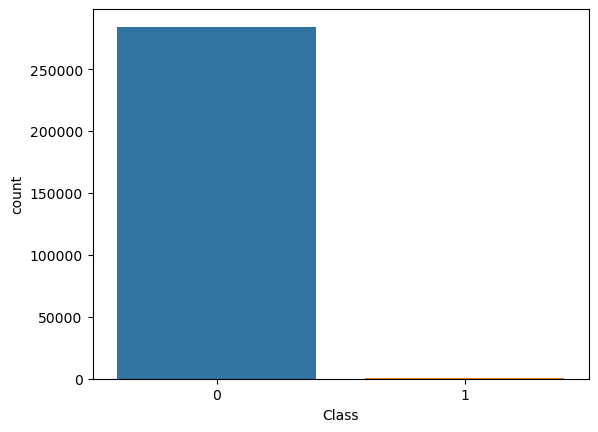

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = raw_data['Class'], data=raw_data)
plt.show()

In [5]:
X = raw_data.iloc[:,1:-1]
y = raw_data.iloc[:,-1]
X.shape, y.shape

((284807, 29), (284807,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [7]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [8]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc


In [10]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc  = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('========')
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('REcall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [14]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [13]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
REcall: 0.5946, F1: 0.7126, AUC:0.7972


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
REcall: 0.7162, F1: 0.7910, AUC:0.8580


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
REcall: 0.7432, F1: 0.8365, AUC:0.8716


In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average =False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [24]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [25]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [30]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [31]:
results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


C:\Users\HoJin\AppData\Local\Temp\ipykernel_27788\1984573935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r')


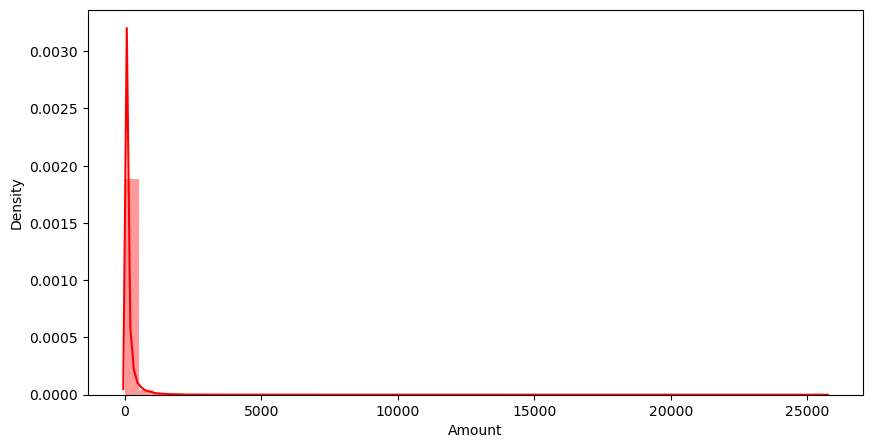

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color='r')
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:,1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [37]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [38]:
results

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


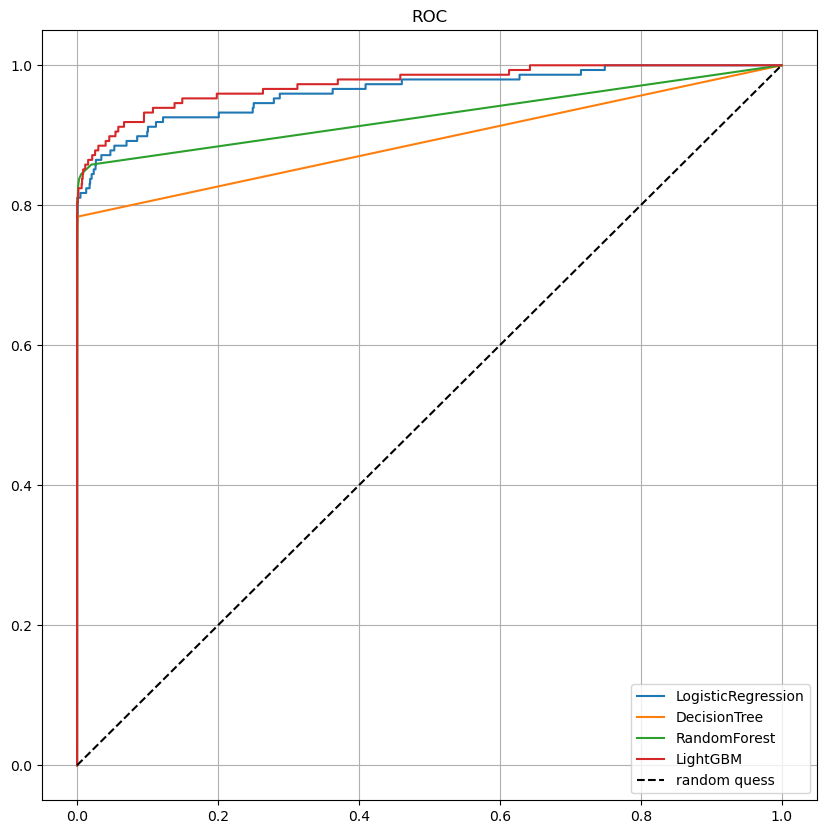

In [39]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)


log로 데이터 변환

In [40]:
amount_log = np.log1p(raw_data['Amount'])
raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


C:\Users\HoJin\AppData\Local\Temp\ipykernel_27788\2081017906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


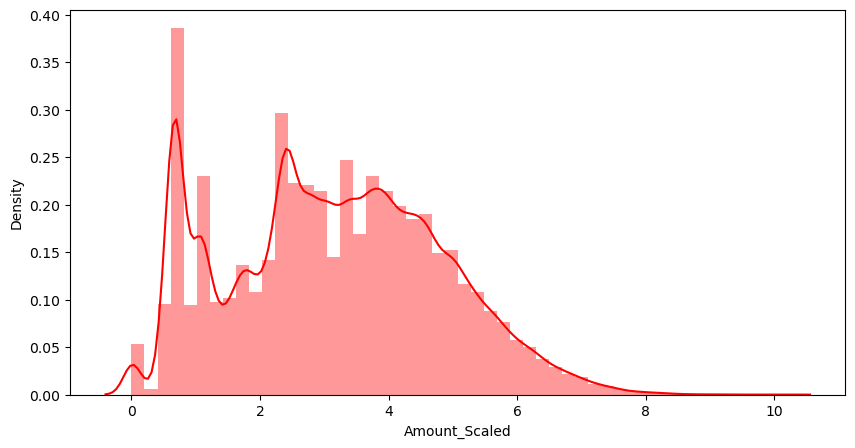

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')
plt.show();

In [43]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


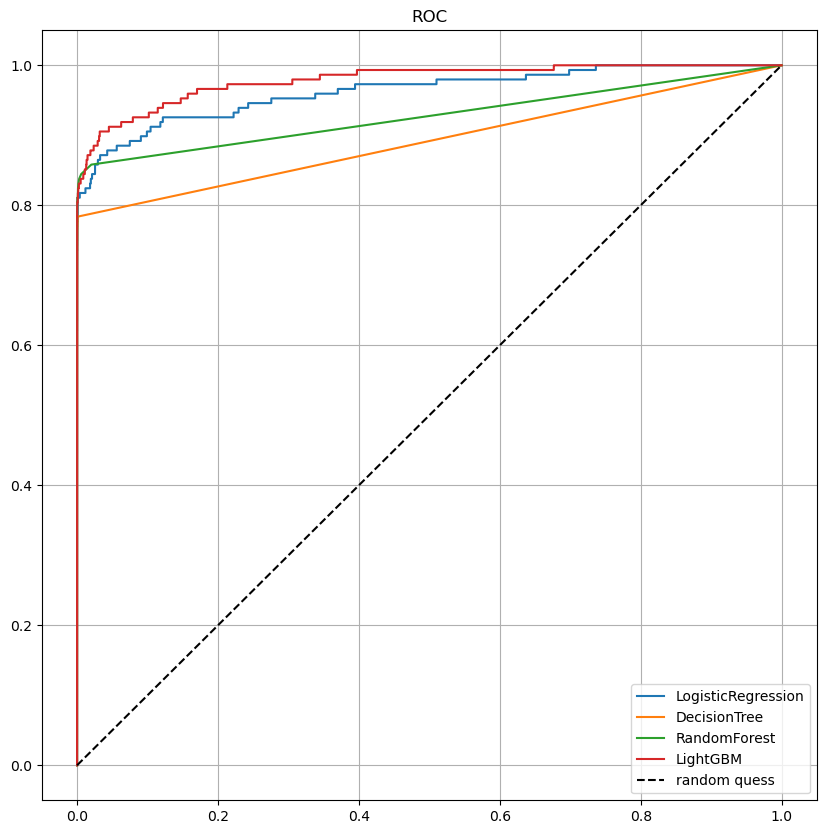

In [44]:
draw_roc_curve(models, model_names, X_test, y_test)


### 3번째 시도

In [56]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [57]:
outlier_index = get_outlier(df = raw_data, column='V14')

In [58]:
raw_data_copy.shape

(284807, 29)

In [59]:
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [66]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
53708,-2.034220,1.670359,1.377750,0.674548,-0.648146,-0.520401,0.398133,0.252472,0.349831,1.025444,...,0.586229,0.005362,0.548214,-0.365167,0.401010,0.710472,-0.100256,0.466929,0.194816,3.866607
249988,1.974120,-0.809883,-0.676559,-1.369053,-1.026026,-1.281213,-0.412713,-0.190390,2.183410,-0.958966,...,-0.138161,-0.205360,-0.500707,0.340161,0.019445,-0.450619,-0.565748,0.014810,-0.031586,3.938470
176536,-1.487805,1.153361,1.766754,-1.842626,1.251140,1.072848,2.883501,-2.446128,3.845544,5.009713,...,1.702473,-0.596972,1.106413,-0.603324,0.230287,-0.419304,0.181660,-1.195708,-1.951939,4.572647
279223,-0.864220,0.800168,1.743000,3.118002,-0.184199,0.867168,-0.219067,0.923531,-0.712231,0.192327,...,-0.248935,-0.118959,-0.649247,0.264355,0.918176,-0.261086,-0.343869,-0.121687,-0.089326,4.059581
239820,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,-0.362047,...,-0.187421,-0.361158,-0.984262,0.354198,0.620709,-0.297138,0.166736,-0.068299,-0.029585,2.301585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277716,2.225812,-1.609652,-1.226124,-1.558452,-0.718028,0.591322,-1.181831,0.085965,-0.973751,1.482984,...,-0.349020,-0.506345,-0.807873,0.216856,-0.129018,-0.087131,-0.325578,0.014053,-0.059244,3.771611
263184,2.265156,-1.194399,-1.344655,-1.649666,-1.026747,-1.252701,-0.639277,-0.320012,-1.937610,1.848689,...,-0.443462,-0.251105,-0.395675,0.289739,0.019534,-0.241642,-0.338043,-0.031788,-0.065138,3.367296
42838,-1.295404,0.094436,0.985177,0.965522,1.263612,0.309611,0.729448,0.208726,-0.736333,-0.144407,...,0.699789,-0.385815,-1.536386,0.302745,-1.435009,0.278876,-0.526251,0.254507,0.154924,4.990433
186391,-0.898949,0.082977,1.178897,-3.118008,-0.806426,-0.243157,-0.531706,0.474555,-2.198213,0.348474,...,-0.298606,-0.175927,-0.148640,-0.326645,0.554915,0.732524,-0.140387,0.152625,0.053274,1.791759


In [71]:
X = raw_data_copy
raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [72]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


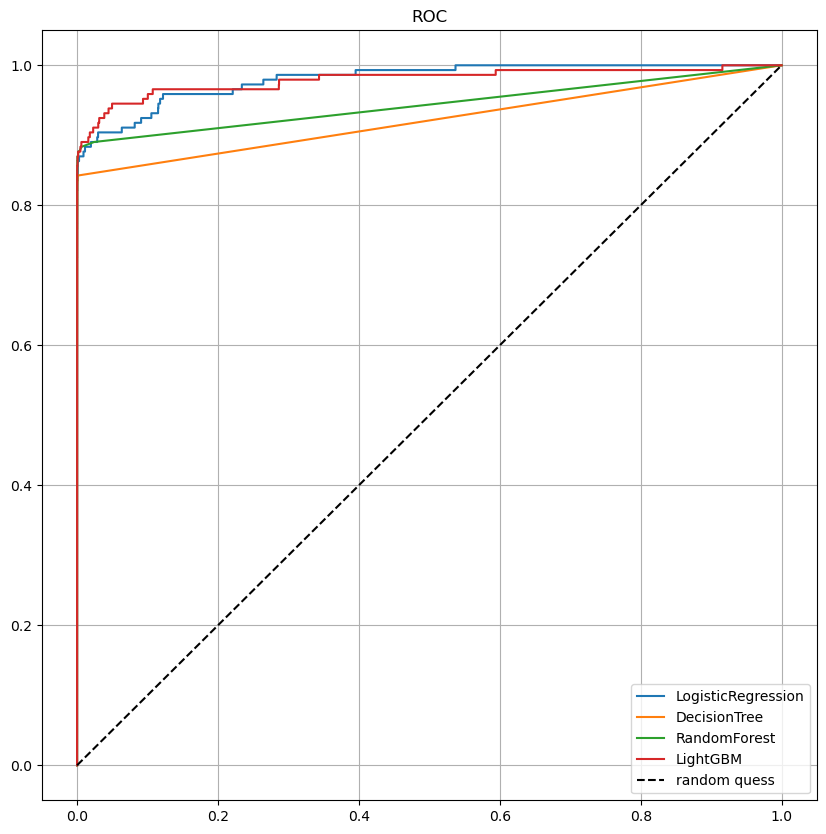

In [73]:
draw_roc_curve(models, model_names, X_test, y_test)


불균형 데이터에서 데이터를 균일하게하는 방법
 - 테스트 데이터는 스케일링말고는 건드리면 안된다

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [75]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [76]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [77]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [78]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)
results

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.975035,0.059032,0.910959,0.110880,0.943052
DecisionTree,0.967908,0.044881,0.876712,0.085390,0.922388
RandomForest,0.999520,0.872340,0.842466,0.857143,0.921127
LightGBM,0.999485,0.849315,0.849315,0.849315,0.924529


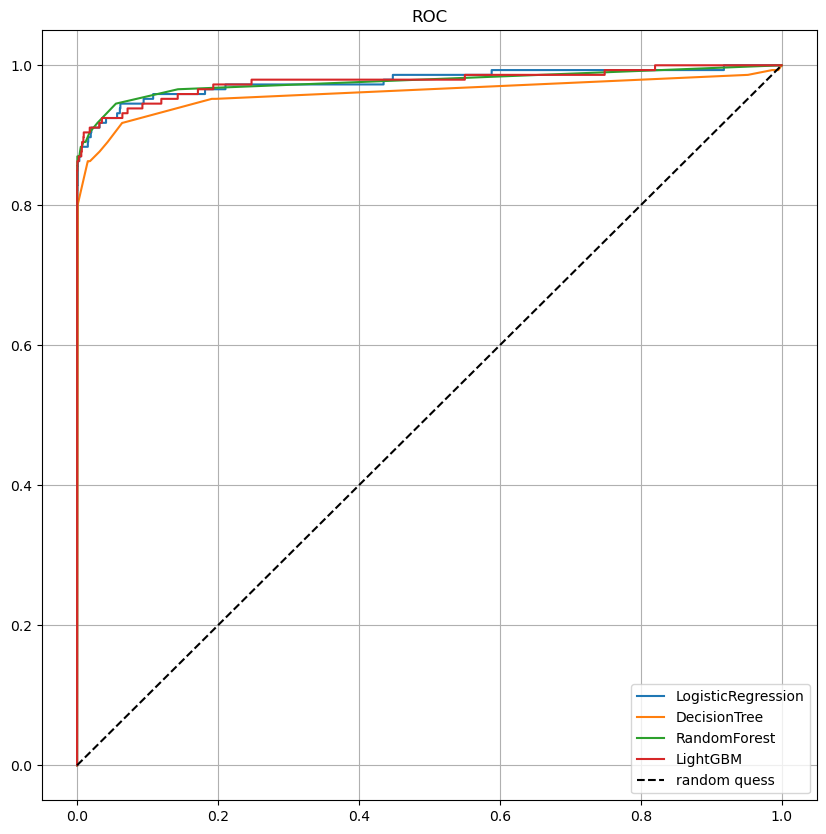

In [79]:
draw_roc_curve(models, model_names, X_test, y_test)